# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [2]:
# Replace this list with your selected tickers
# Tickers: Delta Air Lines, United Air Lines, American Air lines and Southwest Airlines
tickers = ['DAL', 'UAL', 'AAL', 'LUV']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [3]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [12]:
# Download historical data
data = yf.download(tickers, start="2020-01-01", end="2025-12-31", interval="1d", auto_adjust=True)
# Select only the 'High' column for each ticker
df = data['High']

[*********************100%***********************]  4 of 4 completed


In [13]:
df.head()

Ticker,AAL,DAL,LUV,UAL
Date,,,,
2020-01-02,29.192119,57.380403,51.076642,90.570000
2020-01-03,28.185840,56.153377,50.657751,88.160004
2020-01-06,27.388784,55.805557,50.788083,88.070000
2020-01-07,27.578085,56.105071,50.639135,88.160004
2020-01-08,27.986575,57.390066,50.881162,88.449997


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [14]:
# 1. Check for missing values
df.isnull().sum()


,0
Ticker,
AAL,0
DAL,0
LUV,0
UAL,0


In [15]:
# 2. Fill missing values using forward fill
df_filled = df.ffill()   # or high_prices.fillna(method="ffill")


In [16]:
# 3. Recheck for missing values
df_filled.isnull().sum()


,0
Ticker,
AAL,0
DAL,0
LUV,0
UAL,0


## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [17]:
# Add code here 🔧
# 1. Calculate daily percentage returns from df
returns = df.pct_change()

# 2. Drop rows with missing values created by pct_change()
returns = returns.dropna()

# 3. Preview the returns DataFrame
returns.head()


Ticker,AAL,DAL,LUV,UAL
Date,,,,
2020-01-03,-0.034471,-0.021384,-0.008201,-0.026609
2020-01-06,-0.028279,-0.006194,0.002573,-0.001021
2020-01-07,0.006912,0.005367,-0.002933,0.001022
2020-01-08,0.014812,0.022903,0.004779,0.003289
2020-01-09,0.004984,0.001178,0.002927,0.003053


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




<Figure size 1200x600 with 0 Axes>

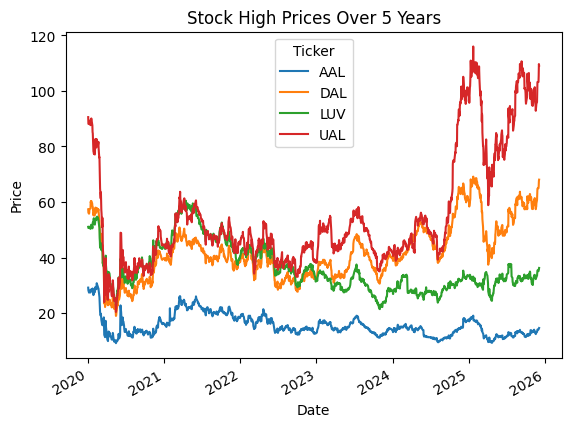

In [18]:
# Add code here 🔧
import matplotlib.pyplot as plt

# 1. Line chart of stock prices over 5-year period
plt.figure(figsize=(12, 6))
df.plot()
plt.title("Stock High Prices Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [19]:
# 2. Standard deviation of daily returns (volatility)
volatility = returns.std()
volatility


,0
Ticker,
AAL,0.038478
DAL,0.029180
LUV,0.024280
UAL,0.036630


In [20]:
# 3. Correlation matrix of daily returns
corr_matrix = returns.corr()
corr_matrix


Ticker,AAL,DAL,LUV,UAL
Ticker,,,,
AAL,1.000000,0.811745,0.700771,0.816348
DAL,0.811745,1.000000,0.745309,0.904339
LUV,0.700771,0.745309,1.000000,0.704584
UAL,0.816348,0.904339,0.704584,1.000000


## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:
To: Prospective Investor
From : Ayush Kessani
Date : 12/02/2025
Subject: 5-Year performance review of the Airline Sector

I analyzed the Airline industry and it's last 5 year daily stock prices. I used the companies, Delta, American, United and Southwest Airlines. I pulled five years of daily high prices, cleaned the data for any missing values and converted the prices to daily % returns.

Over the past 5 years, all airline stocks have gone through substanstial swings. All four companies experienced a sharp decline early in the problem, followed by partial recovery and several additonal cycles of gains and pullbacks. Overall, the group does not show the kind of sustained upward trend seen in some growth sectors; instead, the data reflect a pattern of recovery and setback that mirrors broader shocks to travel demand and operational costs.

Based on this evidence, I would be cautious about recommending a significant new allocation to the airline industry at this time. The combination of high volatility, closely correlated price movements, and the absence of a clear, sustained upward trend suggests that this sector carries meaningful downside risk without a correspondingly strong pattern of long-run returns in the period analyzed.

To strengthen and update this recommendation going forward, future analysis should incorporate additional data beyond price history. Airline fundamentals such as revenue growth, load factors, fuel and labor costs, debt levels, and profitability would help distinguish stronger operators from weaker ones. Macro-level indicators—including consumer spending, GDP growth, interest rates, and jet fuel prices—could provide context for how sensitive airline earnings are to economic conditions.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [21]:
!jupyter nbconvert --to html "assignment_14_kessaniayush.ipynb"

[NbConvertApp] Converting notebook assignment_14_kessaniayush.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 416584 bytes to assignment_14_kessaniayush.html
